In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 5*(x-3)

def fp(x):
    return 5

In [3]:
for x in [-1,3,4]:
    print(f(x),fp(x))

-20 5
0 5
5 5


In [4]:
# Bisection iteration
def bisection(f,a,b):
    c = (a+b)/2
    if f(a)*f(c)>0:
        a = c
    else:
        b = c
    return a,b
    

In [5]:
print(bisection(f,0,4))
print(bisection(f,3,4))

(2.0, 4)
(3, 3.5)


In [6]:
def newton(f,fp,x):
    return x - f(x)/fp(x)

In [7]:
for x in [-100,5,1000]:
    print(newton(f,fp,x))

3.0
3.0
3.0


In [8]:
def secant(f,a,b):
    return b,b-f(b)*(b-a)/(f(b)-f(a))

In [9]:
print(secant(f,0,4))
print(secant(f,5,3))

(4, 3.0)
(3, 3.0)


In [10]:
def g(x):
    return x**2-5*x+4
def gp(x):
    return 2*x-5

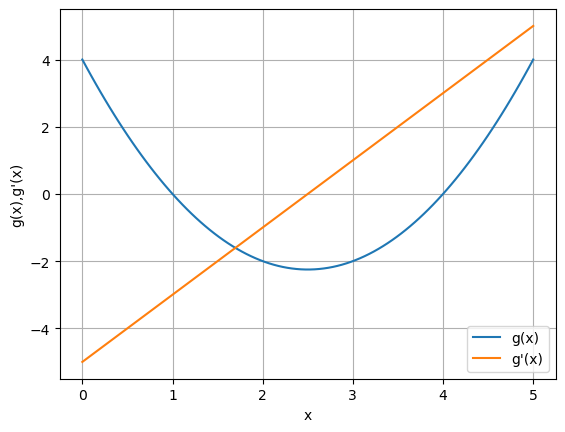

In [11]:
x = np.linspace(0.,5.,100)
plt.plot(x,g(x),label='g(x)')
plt.plot(x,gp(x),label='g\'(x)')
plt.xlabel('x')
plt.ylabel('g(x),g\'(x)')
plt.grid()
plt.legend()
plt.show()

In [12]:
# bisection 
a = 0.
b = 2.4
for i in range(5):
    a,b = bisection(g,a,b)
    print(a,b,g(a))

0.0 1.2 4.0
0.6 1.2 1.3599999999999999
0.8999999999999999 1.2 0.3099999999999996
0.8999999999999999 1.0499999999999998 0.3099999999999996
0.9749999999999999 1.0499999999999998 0.0756250000000005


In [13]:
# Newton
x = 2.4
for i in range(5):
    x = newton(g,gp,x)
    print(x,g(x))

-8.79999999999999 125.43999999999977
-3.2495575221238893 30.807411700211397
-0.5704459920916509 7.177638590351682
0.5983807205160063 1.3661558841052228
0.9575892905079793 0.12903079675567897


In [14]:
# Secant
a = 0.
b = 2.4
for i in range(5):
    a,b = secant(g,a,b)
    print(a,b,g(a))

2.4 1.5384615384615383 -2.24
1.5384615384615383 0.28985507246376896 -1.3254437869822482
0.28985507246376896 1.120562390158172 2.634740600714132
1.120562390158172 1.0238514559648508 -0.3471518805538647
1.0238514559648508 0.9989929953484437 -0.0709854759429085


In [15]:
def f1(x):
    return(np.sqrt(10**2-x**2))
def f2(x):
    return x*np.tan(x)

In [16]:
x = np.linspace(0.,10,100)
x1 = np.linspace(0.,np.pi/2.,100)[1:-1]
x2 = np.linspace(np.pi/2.,3*np.pi/2.,100)[1:-1]
x3 = np.linspace(3*np.pi/2.,5.*np.pi/2,100)[1:-1]
x4 = np.linspace(5*np.pi/2,7*np.pi/2,100)[1:-1]


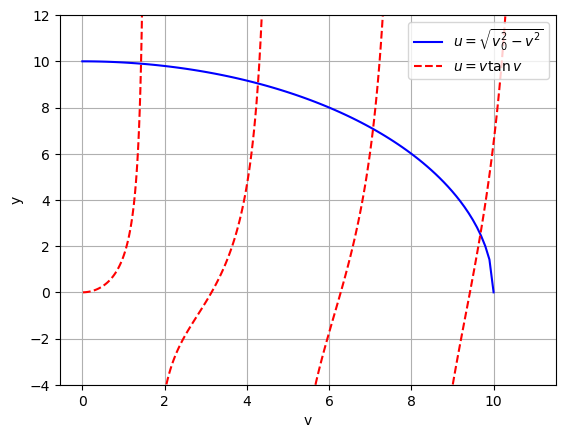

In [17]:
plt.plot(x,f1(x),'b-',label=r'$u=\sqrt{v_0^2-v^2}$')
plt.plot(x1,f2(x1),'r--',label=r'$u=v\tan v$')
plt.plot(x2,f2(x2),'r--')
plt.plot(x3,f2(x3),'r--')
plt.plot(x4,f2(x4),'r--')
plt.xlabel('v')
plt.ylabel('y')
plt.ylim(-4.,12)
plt.legend()
plt.grid()

plt.show()
#plt.savefig('transcendental.pdf')

In [18]:
def h(x):
    return(f2(x)-f1(x))
def hp(x):
    return np.tan(x)+x/np.cos(x)**2 + x/np.sqrt(10**2-x**2)

In [19]:
for v in [1,1.5,2,4.5]:
    print(np.around(h(v),2),np.around(hp(v),2))

-8.39 5.08
11.27 314.03
-14.17 9.57
11.94 106.41


In [20]:
a,b = 6.,8.
maxit = 50
for n in range(maxit):
    a,b = bisection(h,a,b)
    if abs(h(a))<.0001:
        break

print(n+1,a,h(a))
    

18 7.068885803222656 -8.774148586443431e-05


In [21]:
a,b = 6.,8.
maxit = 50
for n in range(maxit):
    a,b = secant(h,a,b)
    if abs(h(a))<.0001:
        break

print(n+1,a,h(a))
    

11 7.068891231620698 -9.238975096081958e-08


In [22]:
maxit = 500
a = 6.
for n in range(maxit):
    a = newton(h,hp,a)
    if abs(h(a))<.0001:
        break

print(n+1,a,h(a))


5 7.068891335559595 1.5858588096051562e-06


In [23]:
def trap(f,a,b,n):
    h = (b-a)/(n-1)
    I = (f(a)+f(b))/2.
    for i in range(1,n-1):
        I += f(a+i*h)
    I *= h
    return I

In [25]:
for n in range(2,5):
    print(f'{trap(np.sin,0.,np.pi,n):.2f}')

0.00
1.57
1.81


In [39]:
def itertrap(f,a,b,eps,maxit=10000):
    m = 0
    Iold = trap(f,a,b,2**m+1)
    while True:
        m += 1
        I = trap(f,a,b,2**m+1)
        print(m,I)
        if abs(I-Iold)<eps:
            break
        Iold = I
    return I,m

In [40]:
I,m=itertrap(np.sin,0.,np.pi/2,1e-6)
print(I,m+1)

1 0.9480594489685199
2 0.9871158009727754
3 0.9967851718861696
4 0.9991966804850723
5 0.9997991943200188
6 0.9999498000921013
7 0.9999874501175259
8 0.9999968625352881
9 0.9999992156341924
10 0.9999998039085701
0.9999998039085701 11


In [41]:
print(np.pi/2*.5)

0.7853981633974483


In [42]:
def fpend(x):
    return 2/np.pi/np.sqrt(1-np.sin(.5)**2*np.sin(x))

In [43]:
I,m=itertrap(fpend,0.,np.pi/2,1e-6)
print(I,m+1)

1 1.081240875019708
2 1.0840900271021188
3 1.0847970037061703
4 1.0849734089947336
5 1.085017489053911
6 1.0850285077385236
7 1.0850312623265221
8 1.0850319509683233
1.0850319509683233 9


In [168]:
from scipy.integrate import quad

In [169]:
print(quad(fpend,0,np.pi/2.))

(1.0850321805151288, 1.2046277092671352e-14)
